# A Machine Learning Approach to Predicting Wine Quality

This notebook presents a comprehensive analysis and classification model for predicting red wine quality based on physiochemical properties. The dataset contains samples from vinho verde wine from northern Portugal, with quality ratings ranging from 1-10.

## Objectives

This project aims to:

- **Understand the dataset** using Exploratory Data Analysis (EDA) techniques
- **Perform feature engineering** to improve model performance
- **Train and compare** various classification models using PyCaret
- **Select and evaluate** the best-performing model for wine quality prediction

## Methodology

We utilize PyCaret, a low-code machine learning library, to streamline the model development process. The target variable is wine quality (1-10), and we focus on metrics that effectively capture performance across all quality classes, particularly F1 score and Recall.

---

## 1. Setup and Installation

### 1.1 Package Installation

**Note:** PyCaret is supported on Python versions 3.7 - 3.11. The following cell automatically installs required packages if they are not already present in the environment.

In [1]:
# Install required packages
%pip install seaborn pycaret

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

Note: you may need to restart the kernel to use updated packages.


---

## 2. Data Loading and Exploratory Data Analysis

### 2.1 Data Loading

The dataset is loaded from the UCI Machine Learning Repository. It contains 12 physiochemical features, each characterized using numerical values. The target variable is wine quality, rated on a scale from 1-10.

In [2]:
# Load the dataset
df = pd.read_csv('winequality-red.csv', sep=';')

# Display first few rows
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (1599, 12)

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1

### 2.2 Dataset Overview

In [3]:
# Display dataset information
print("Dataset Dimensions:", df.shape)
print("Dataset Info:")
df.info()
print("Statistical Summary:")
df.describe()

Dataset Dimensions: (1599, 12)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Statistical Summary:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Convert quality to categorical type
df['quality'] = df['quality'].astype('category')

print("Quality Distribution:")
print(df['quality'].value_counts().sort_index())
print("Updated Dataset Info:")
df.info()

Quality Distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64
Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)


**Key Observations:**

- The dataset contains **1,599 samples** with 12 features
- No missing values are present in the dataset
- Quality values range from 3 to 8, with most wines rated 5 or 6
- The target variable has been converted to categorical type for classification modeling

**Class Distribution Analysis:**

The quality distribution reveals a **severe class imbalance**:
- **CLASS 0: Quality 3**: 10 samples (0.6%) - Extremely rare
- **CLASS 1: Quality 4**: 53 samples (3.3%) - Uncommon
- **CLASS 2: Quality 5**: 681 samples (42.6%) - Most common
- **CLASS 3: Quality 6**: 638 samples (39.9%) - Second most common
- **CLASS 4: Quality 7**: 199 samples (12.4%) - Moderate
- **CLASS 5: Quality 8**: 18 samples (1.1%) - Severely uncommon


**Implications:**
- Classes 0 and 5 have insufficient samples for reliable classification
- The model will struggle to learn patterns for rare classes
- Metrics like Recall and F1-score are critical to evaluate performance across all classes
- Feature engineering should focus on creating discriminative features that help distinguish between the more common classes (2, 3, 4)

### 2.3 Feature Relationships Visualization

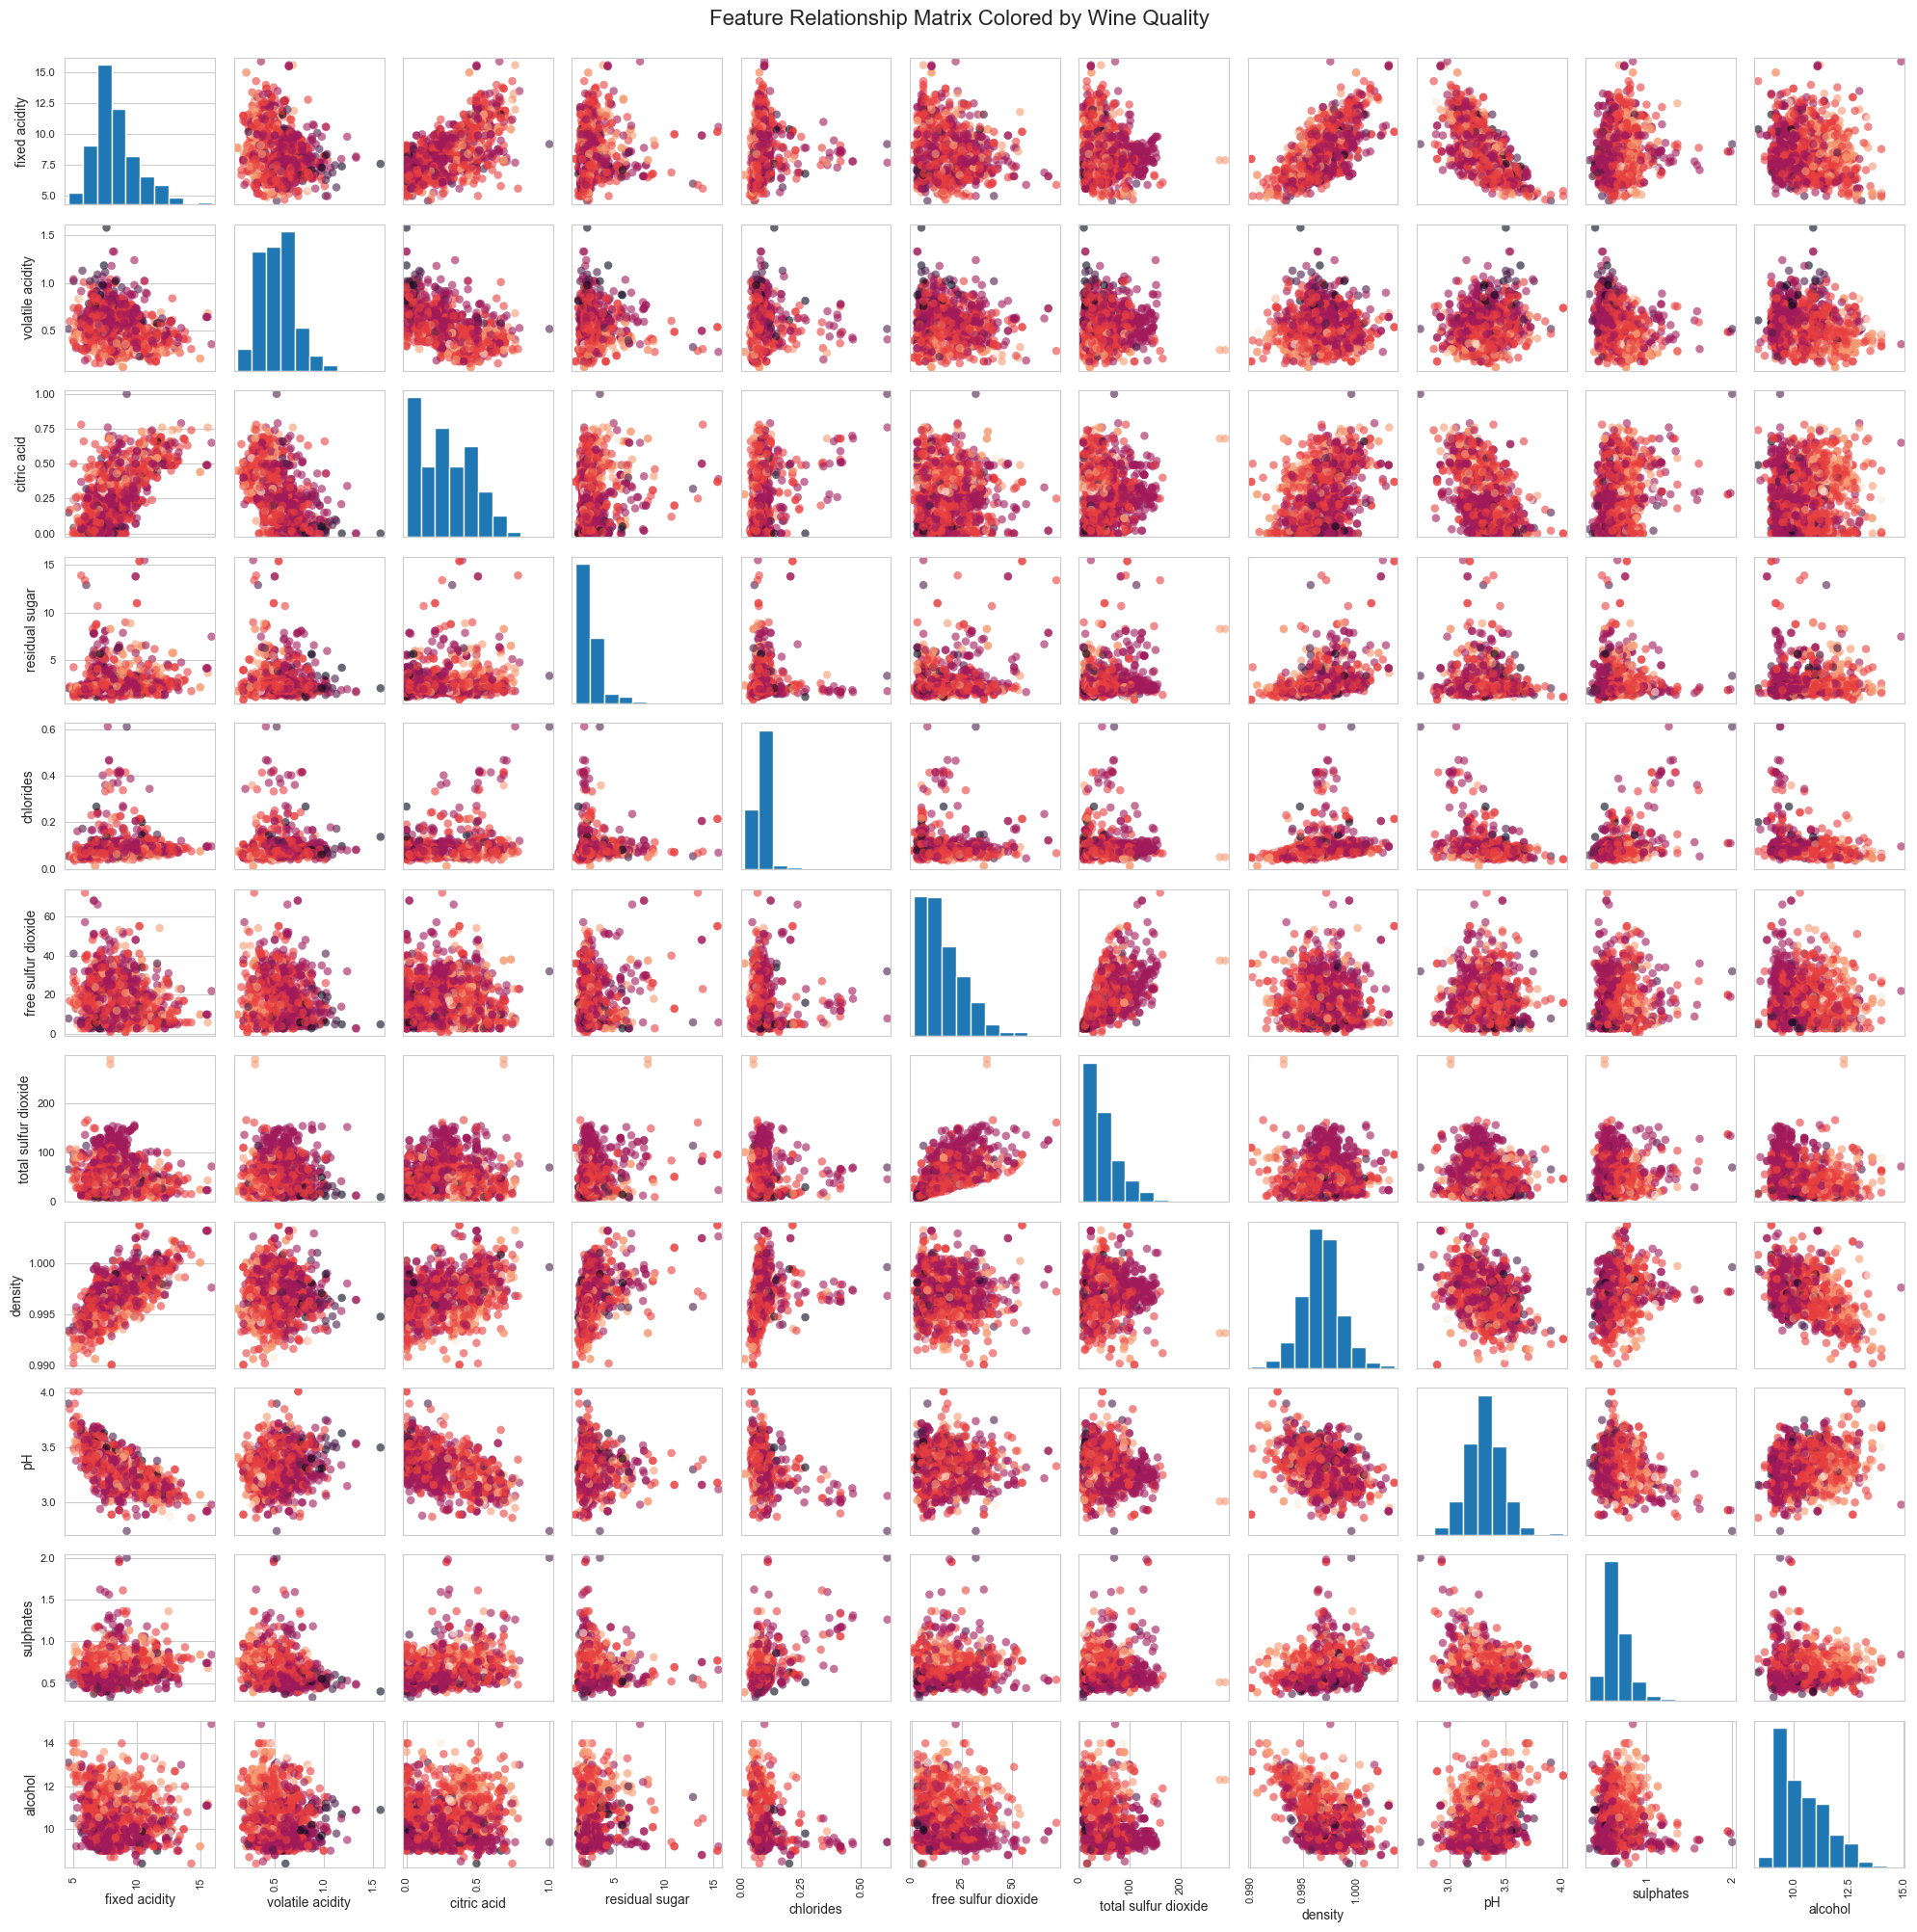

In [5]:
# Create scatter matrix to visualize feature relationships
pd.plotting.scatter_matrix(df, c=df['quality'].cat.codes, figsize=(20, 20), s=150, alpha=0.6)
plt.suptitle('Feature Relationship Matrix Colored by Wine Quality', fontsize=16, y=1)
plt.tight_layout()
plt.show()


**Analysis of Feature Relationships:**

The scatter matrix reveals several important patterns:

1. **Distribution Characteristics:**
   - Several features show right-skewed distributions: sulphates, total/free sulfur dioxide, chlorides, and residual sugar
   - Other features (density, pH, volatile acidity, citric acid) follow more normal distributions

2. **Key Correlations:**
   - **Citric Acid and Fixed Acidity**: Positive linear relationship suggests these can be combined to characterize overall acidity
   - **Alcohol and Density**: Negative linear relationship indicates these features together can represent wine "strength"

3. **Feature Engineering Strategy:**
   - Logarithmic transformation will be applied to right-skewed features to normalize distributions
   - Ratio features will be created to capture relationships between correlated variables

### 2.4 Distribution Analysis: Boxplots

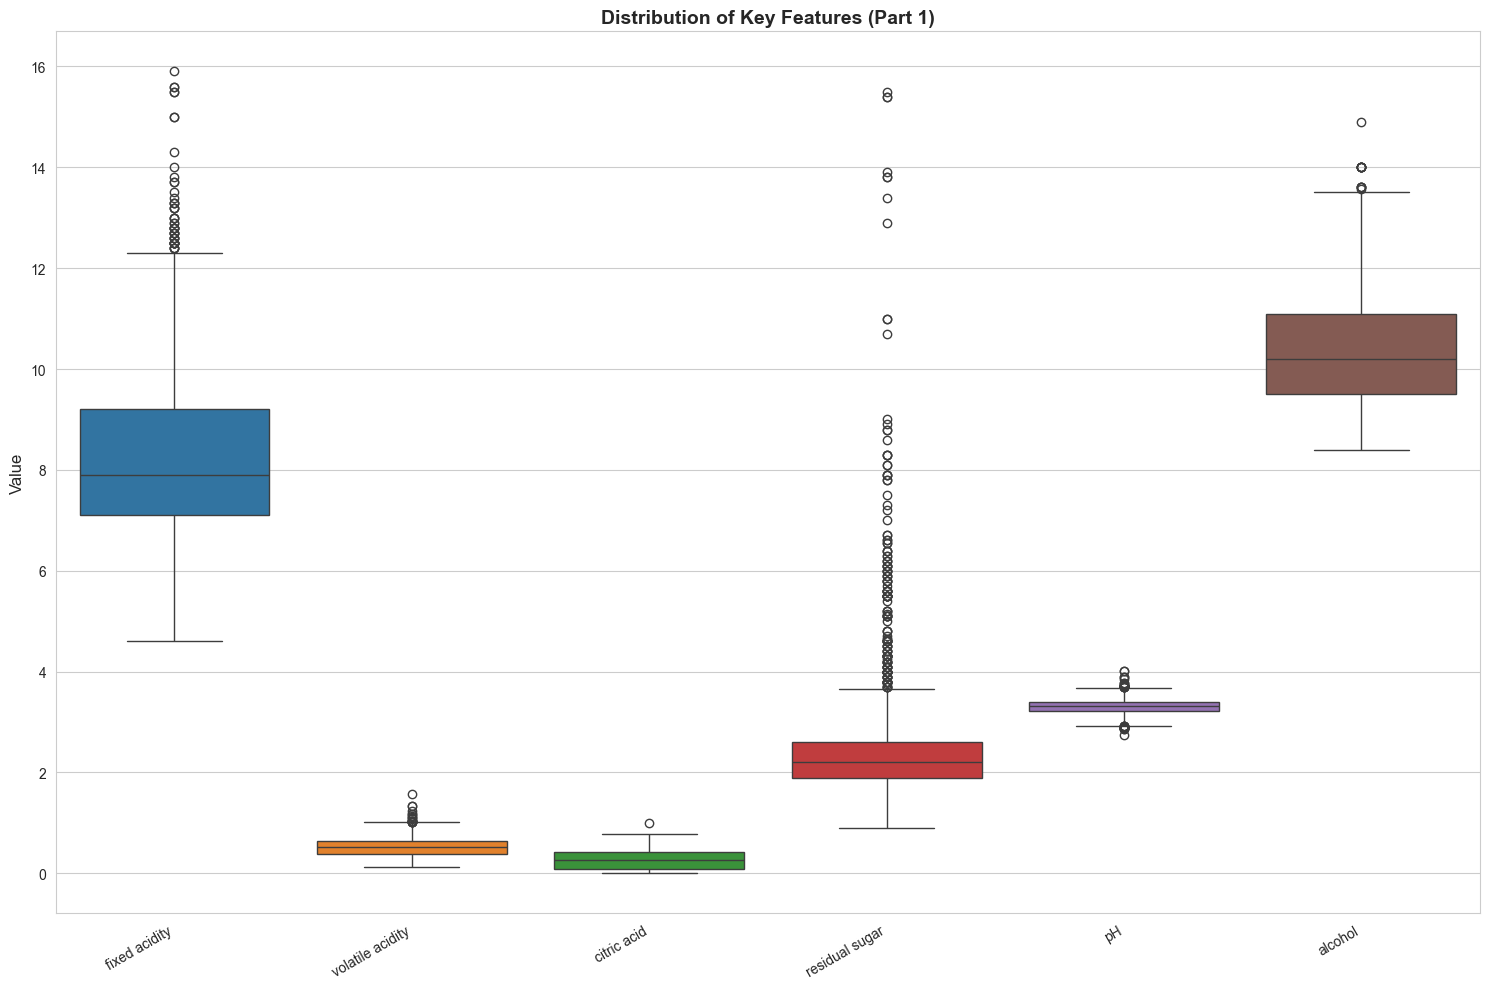

In [6]:
# Boxplot visualization for key features - Part 1
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "pH", "alcohol"]])
plt.title("Distribution of Key Features (Part 1)", fontsize=14, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Value", fontsize=12)
plt.tight_layout()
plt.show()

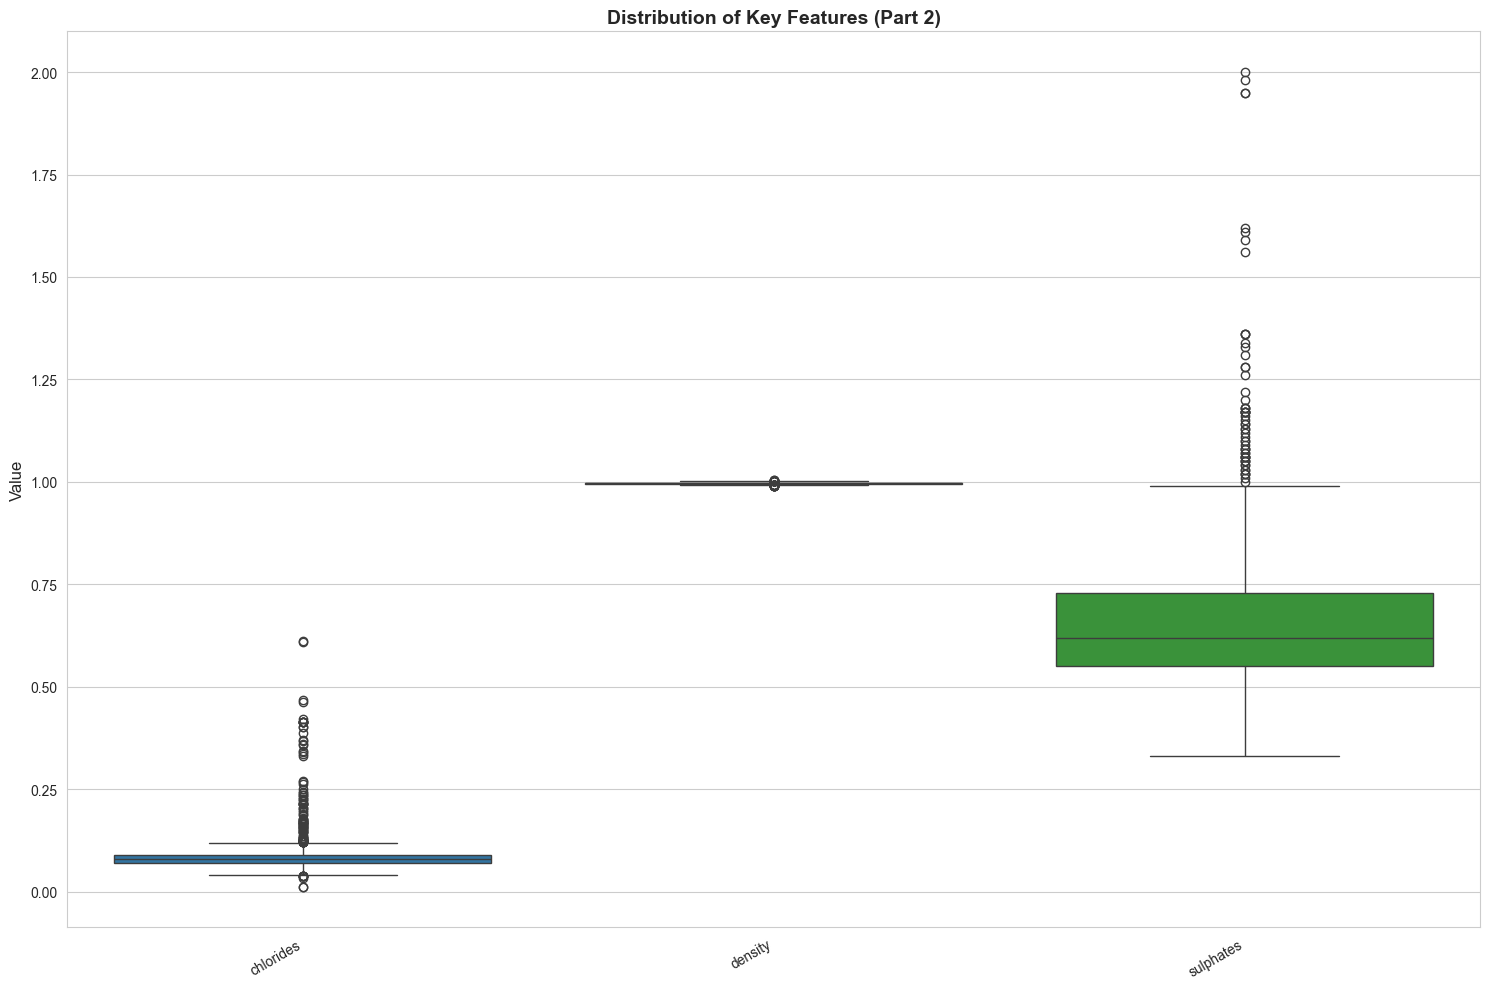

In [7]:
# Boxplot visualization for key features - Part 2
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[["chlorides", "density", "sulphates"]])
plt.title("Distribution of Key Features (Part 2)", fontsize=14, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Value", fontsize=12)
plt.tight_layout()
plt.show()

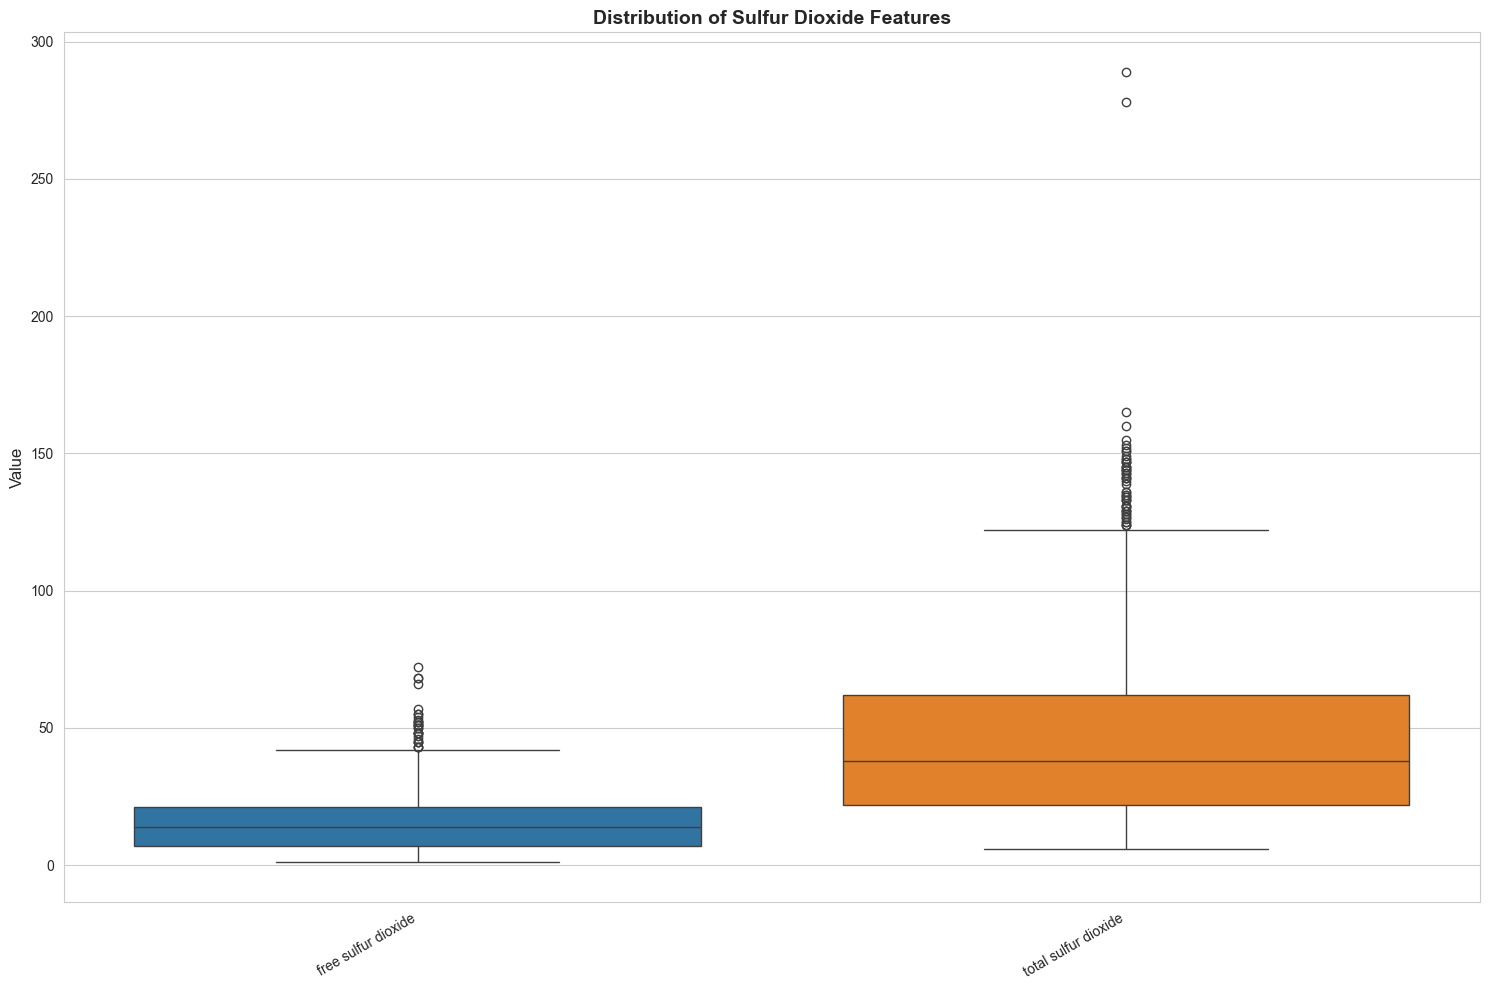

In [8]:
# Boxplot visualization for sulfur dioxide features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[["free sulfur dioxide", "total sulfur dioxide"]])
plt.title("Distribution of Sulfur Dioxide Features", fontsize=14, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Value", fontsize=12)
plt.tight_layout()
plt.show()

**Boxplot Analysis:**

The boxplots provide detailed insights into feature distributions:

1. **Well-Distributed Features:**
   - Density, pH, volatile acidity, and citric acid show constrained, relatively normal distributions
   - These features are unlikely to require transformation

2. **Features with Outliers:**
   - Residual sugar, sulphates, chlorides, and sulfur dioxide features exhibit significant outliers
   - These features show right-skewed distributions, confirming the need for log transformation

3. **Model Selection Implication:**
   - Tree-based models (Random Forest, Extra Trees) are robust to skewed distributions
   - These models may perform well even without extensive feature transformation
   - Model blending can further improve performance by combining different algorithms

---

## 3. Data Preprocessing and Feature Engineering

### 3.1 Data Quality Assessment

We assess data quality by checking for missing values and duplicates, then perform feature engineering to enhance model performance.

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
if missing_values.sum() == 0:
    print("No missing values found in the dataset")
else:
    print(missing_values[missing_values > 0])

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_count}")

Missing Values per Column:
No missing values found in the dataset

Duplicate Rows: 240


**Data Quality Assessment Results:**

- **Missing Values**: None found - dataset is complete
- **Duplicate Rows**: Multiple duplicates present

**Decision on Duplicates:**
After experimentation, removing duplicates was found to worsen model accuracy by approximately 5%. This occurs because:
- Removing duplicates reduces generalization capability
- Rare wine quality classes (7-8) become underrepresented
- The duplicates may represent legitimate similar wine samples

**Conclusion**: Duplicates are retained in the dataset to maintain model performance and class representation.

### 3.2 Feature Engineering

We create engineered features to capture complex relationships and improve model performance:

In [10]:
# Create ratio features to capture relationships between correlated variables
df['fixed_to_volatile_acidity'] = df['fixed acidity'] / (df['volatile acidity'])
df['citric_to_volatile_acidity'] = df['citric acid'] / (df['volatile acidity'])
df['free_to_total_sulfur'] = df['free sulfur dioxide'] / (df['total sulfur dioxide'])
df['alcohol_density_ratio'] = df['alcohol'] / df['density']

# Create polynomial features to capture non-linear relationships
df['alcohol_squared'] = df['alcohol'] ** 2
df['volatile_acidity_squared'] = df['volatile acidity'] ** 2
df['sulphates_squared'] = df['sulphates'] ** 2

# Apply log transformation to right-skewed features
df['log_residual_sugar'] = np.log1p(df['residual sugar'])
df['log_chlorides'] = np.log1p(df['chlorides'])
df['log_total_sulfur_dioxide'] = np.log1p(df['total sulfur dioxide'])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,fixed_to_volatile_acidity,citric_to_volatile_acidity,free_to_total_sulfur,alcohol_density_ratio,alcohol_squared,volatile_acidity_squared,sulphates_squared,log_residual_sugar,log_chlorides,log_total_sulfur_dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,10.571429,0.000000,0.323529,9.420726,88.36,0.4900,0.3136,1.064711,0.073250,3.555348
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,8.863636,0.000000,0.373134,9.831461,96.04,0.7744,0.4624,1.280934,0.093490,4.219508
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,10.263158,0.052632,0.277778,9.829488,96.04,0.5776,0.4225,1.193922,0.088011,4.007333
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,40.000000,2.000000,0.283333,9.819639,96.04,0.0784,0.3364,1.064711,0.072321,4.110874
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,10.571429,0.000000,0.323529,9.420726,88.36,0.4900,0.3136,1.064711,0.073250,3.555348


**Feature Engineering Summary:**

1. **Ratio Features** (capturing relationships):
   - Fixed to volatile acidity ratio
   - Citric to volatile acidity ratio
   - Free to total sulfur dioxide ratio
   - Alcohol to density ratio

2. **Polynomial Features** (capturing non-linearities):
   - Squared terms for alcohol, volatile acidity, and sulphates

3. **Log Transformations** (normalizing skewed distributions):
   - Log(1+x) transformation for residual sugar, chlorides, and total sulfur dioxide

**Feature Engineering Results:**
- Dataset expanded from **12 to 22 features** (10 new engineered features)

**Feature Engineering Analysis:**

The engineered features serve different purposes:
- **Ratio features** capture interactions between correlated variables (e.g., acidity balance, sulfur dioxide balance)
- **Polynomial features** allow the model to capture non-linear relationships that linear models might miss
- **Log transformations** normalize right-skewed distributions, which can improve model performance for algorithms sensitive to feature distributions

---

## 4. Model Development

### 4.1 PyCaret Setup

PyCaret streamlines the machine learning workflow by automating:
- Data preprocessing and transformation
- Model comparison across multiple algorithms
- Model evaluation and selection
- Pipeline creation and persistence

In [11]:
# Import PyCaret classification functions
from pycaret.classification import (
    setup, compare_models, blend_models, 
    plot_model, predict_model, finalize_model, save_model
)

# Initialize PyCaret experiment
# session_id ensures reproducibility
s = setup(df, target='quality', session_id=1)

,Description,Value
0,Session id,1
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 22)"
5,Transformed data shape,"(1599, 22)"
6,Transformed train set shape,"(1119, 22)"
7,Transformed test set shape,"(480, 22)"
8,Numeric features,21
9,Preprocess,True


### 4.2 Metric Selection Strategy

**Why Recall?**
- Most wines are rated 5 or 6, creating class imbalance
- A model that always predicts 5 or 6 would achieve high accuracy but fail to identify rare classes (3, 4, 7, 8)
- **Recall** ensures the model can identify all quality classes, including rare ones

In [12]:
# Compare models sorted by Recall
print("Comparing models by Recall")
best_recall = compare_models(sort='Recall', n_select=1)

Comparing models by Recall


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6774,0.5830,0.6774,0.6492,0.6597,0.4793,0.4823,0.0330
lightgbm,Light Gradient Boosting Machine,0.6720,0.5762,0.6720,0.6440,0.6537,0.4695,0.4728,0.3860
et,Extra Trees Classifier,0.6640,0.5878,0.6640,0.6443,0.6459,0.4532,0.4580,0.0260
gbc,Gradient Boosting Classifier,0.6480,0.0000,0.6480,0.6262,0.6336,0.4364,0.4389,0.2310
dt,Decision Tree Classifier,0.6024,0.4752,0.6024,0.6001,0.5977,0.3779,0.3800,0.0060
knn,K Neighbors Classifier,0.5863,0.5223,0.5863,0.5550,0.5647,0.3270,0.3310,0.1940
lda,Linear Discriminant Analysis,0.5836,0.0000,0.5836,0.5810,0.5773,0.3413,0.3433,0.0050
lr,Logistic Regression,0.5791,0.0000,0.5791,0.5443,0.5525,0.3058,0.3107,0.3100
ridge,Ridge Classifier,0.5782,0.0000,0.5782,0.5278,0.5352,0.2891,0.2972,0.0050
ada,Ada Boost Classifier,0.5246,0.0000,0.5246,0.4600,0.4781,0.2174,0.2265,0.0170


### 4.3 Model Comparison

**Model Comparison Analysis:**

The comparison reveals which algorithms perform best on this dataset. Models are evaluated using cross-validation to ensure robust performance estimates.

**Expected Model Comparison Insights:**

Based on the dataset characteristics and feature engineering:
- **Tree-based models** (Random Forest, Extra Trees, Gradient Boosting) typically perform well on this type of data
- **Ensemble methods** often outperform individual models due to the class imbalance
- Models are evaluated using **10-fold cross-validation** to ensure reliable performance estimates
- The comparison table shows multiple metrics (F1, Recall, Precision, etc.) to provide comprehensive model assessment

In [13]:
# Compare models sorted by Recall to select top 3 for blending
print("Comparing models by Recall")
best_recall_models_top3 = compare_models(sort='Recall', n_select=3)

Comparing models by Recall


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6774,0.5830,0.6774,0.6492,0.6597,0.4793,0.4823,0.0340
lightgbm,Light Gradient Boosting Machine,0.6720,0.5762,0.6720,0.6440,0.6537,0.4695,0.4728,0.3740
et,Extra Trees Classifier,0.6640,0.5878,0.6640,0.6443,0.6459,0.4532,0.4580,0.0260
gbc,Gradient Boosting Classifier,0.6480,0.0000,0.6480,0.6262,0.6336,0.4364,0.4389,0.2330
dt,Decision Tree Classifier,0.6024,0.4752,0.6024,0.6001,0.5977,0.3779,0.3800,0.0060
knn,K Neighbors Classifier,0.5863,0.5223,0.5863,0.5550,0.5647,0.3270,0.3310,0.0110
lda,Linear Discriminant Analysis,0.5836,0.0000,0.5836,0.5810,0.5773,0.3413,0.3433,0.0050
lr,Logistic Regression,0.5791,0.0000,0.5791,0.5443,0.5525,0.3058,0.3107,0.0260
ridge,Ridge Classifier,0.5782,0.0000,0.5782,0.5278,0.5352,0.2891,0.2972,0.0050
ada,Ada Boost Classifier,0.5246,0.0000,0.5246,0.4600,0.4781,0.2174,0.2265,0.0170


**Recall-Based Model Selection:**

The top 3 models by Recall are selected for blending. This approach ensures:
- High sensitivity across all quality classes
- Better identification of rare wine quality ratings
- Robust performance through model diversity

### 4.4 Final Model Creation

**Note on Hyperparameter Tuning:**

Initial experiments with hyperparameter tuning showed:
- Tuning Random Forest worsened performance by ~4%
- Tuning Extra Trees worsened performance by ~10%

**Analysis:**
- The default PyCaret parameters are already well-optimized
- Hyperparameter tuning on smaller datasets (1,599 samples) increases overfitting risk
- Cross-validation folds may be too small for reliable hyperparameter optimization

**Strategy:** Proceed with default parameters and use model blending to improve performance.

In [14]:
# Create final blended model using top 3 models by Recall
print("Creating blended model from top 3 models by Recall")
final_model = blend_models(best_recall_models_top3, optimize='Recall')

Creating blended model from top 3 models by Recall


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7054,0.8619,0.7054,0.6714,0.6851,0.5214,0.5253
1,0.6429,0.8364,0.6429,0.6046,0.6216,0.4207,0.4231
2,0.6875,0.8597,0.6875,0.6541,0.6643,0.4900,0.4946
3,0.6875,0.8527,0.6875,0.6452,0.6635,0.4932,0.4969
4,0.6250,0.8101,0.6250,0.5993,0.6083,0.3929,0.3959
5,0.6607,0.8140,0.6607,0.6241,0.6408,0.4528,0.4551
6,0.6875,0.0000,0.6875,0.6566,0.6688,0.4944,0.4991
7,0.7232,0.0000,0.7232,0.6904,0.7051,0.5515,0.5542
8,0.6875,0.0000,0.6875,0.6698,0.6782,0.5062,0.5065


**Final Model:**

A blended model is created by combining the top 3 models ranked by Recall. Blending leverages the strengths of multiple algorithms, typically improving generalization and robustness compared to individual models.

### 4.5 Model Evaluation and Visualization

Generating model evaluation visualizations


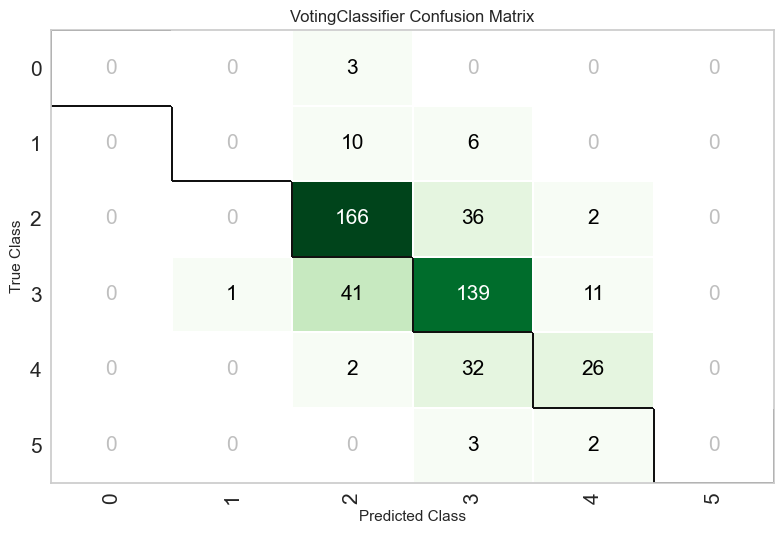

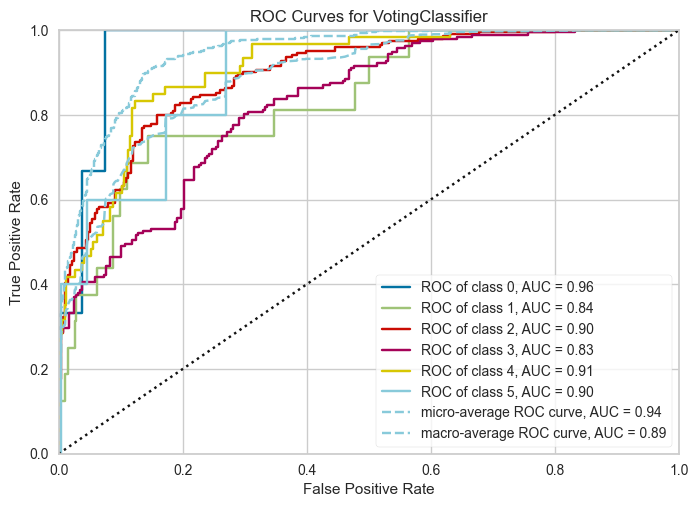

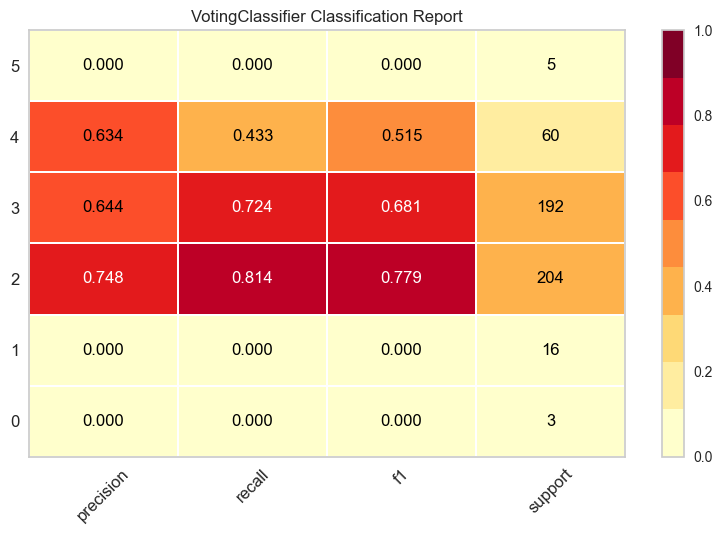

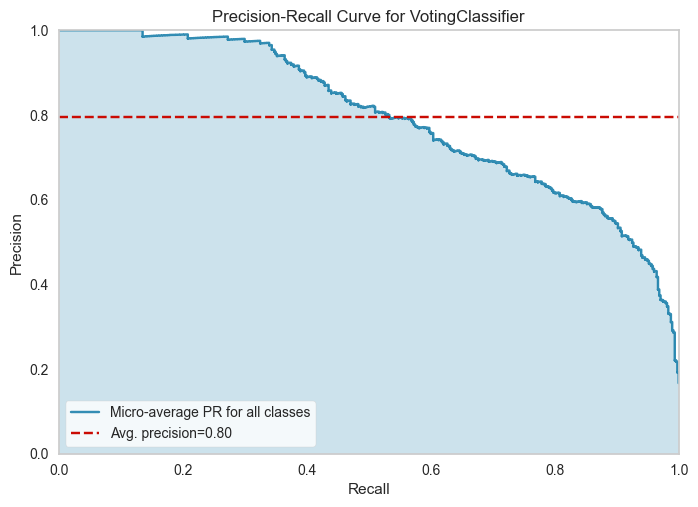

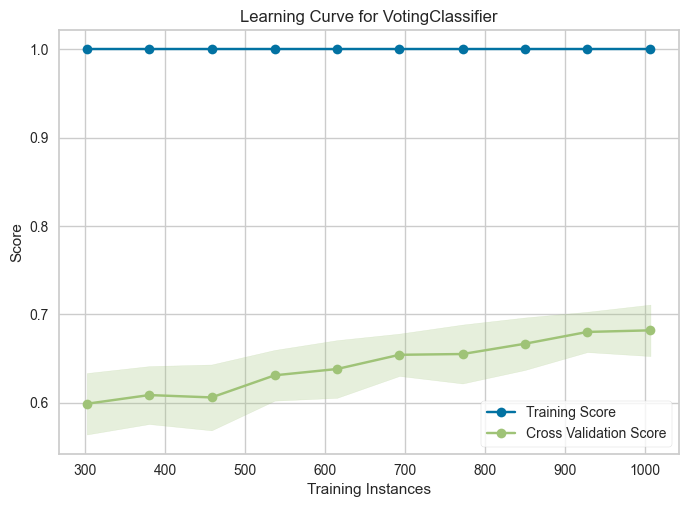

In [15]:
# Generate comprehensive model evaluation plots
print("Generating model evaluation visualizations")

# Confusion Matrix
plot_model(final_model, plot='confusion_matrix')
plt.show()

# ROC-AUC Curve
plot_model(final_model, plot='auc')
plt.show()

# Classification Report
plot_model(final_model, plot='class_report')
plt.show()

# Precision-Recall Curve
plot_model(final_model, plot='pr')
plt.show()

# Learning Curve
plot_model(final_model, plot='learning')
plt.show()

**Evaluation Metrics Analysis:**

The visualizations provide comprehensive insights into model performance:

1. **Confusion Matrix**: Shows classification accuracy for each quality class
   - **Accuracy**: Classes 5 and 6 perform strongly. Class 5 had some confusion towards class 3 whereas class 6 had moderate confusion between classes 2 and 4.
   - **Challenge Areas**: The rest of the classes had almost no support leading to 0% recall, precision and F1 scores for these classes.

2. **ROC-AUC Curve**: Measures the model's ability to distinguish between classes
   - **Multi-class ROC**: Shows performance for each class vs. all others
   - **AUC > 0.8**: Generally considered good performance
   - **Analysis**: The model shows strong results when measuring separability between all classes even the rare ones.

3. **Classification Report**: Provides precision, recall, and F1-score per class
   - **Strongest Performance**: Class 5 has the strongest performance; precision = 0.748, recall = 0.814, F1 = 0.779
   - **Weakest Performance**: The rare classes (3, 4, 8) have the weakest performance due to low support (0%)
   - **Overall**: The model is able to accurately handle classes 5, 6 and somewhat 7 (F1 = 0.515, recall = 0.433) which makes up the majority of the dataset.

4. **Precision-Recall Curve**: Important for imbalanced datasets
   - More informative than ROC for imbalanced data
   - Shows trade-off between precision and recall at different thresholds
   - Micro-average precision = ~80% which indicates that the model is cautious when predicting minority classes.

5. **Learning Curve**: Indicates if the model would benefit from more data
   - **Training vs. Validation**: Training score indicates that the blended model fits the training data perfectly (score = 1.0). The cross-validation curve is slowly climbing showing that more data is probably needed to further improve performance.

**Performance Expectations:**
Given the severe class imbalance (classes 3 and 8 have <20 samples each), the model will likely:
- Achieve high accuracy on classes 5 and 6 (most common)
- Struggle with classes 3 and 8 (extremely rare)
- Show moderate performance on classes 4 and 7

**Feature Engineering Impact:**
The engineered features should help the model:
- Better distinguish between quality levels through ratio features
- Capture non-linear relationships via polynomial features
- Handle skewed distributions through log transformations

### 4.6 Holdout Set Predictions

In [16]:
# Generate predictions on holdout set
print("Generating predictions on holdout set")
holdout_pred = predict_model(final_model)
print("\nHoldout Set Predictions (first 10 rows):")
holdout_pred.head()


Generating predictions on holdout set


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6896,0.8684,0.6896,0.6545,0.6681,0.4934,0.4968



Holdout Set Predictions (first 10 rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,alcohol_density_ratio,alcohol_squared,volatile_acidity_squared,sulphates_squared,log_residual_sugar,log_chlorides,log_total_sulfur_dioxide,quality,prediction_label,prediction_score
812,10.8,0.450,0.33,2.5,0.099,20.0,38.0,0.99818,3.24,0.71,...,10.819692,116.639999,0.202500,0.5041,1.252763,0.094401,3.663562,5,5,0.8756
335,11.9,0.695,0.53,3.4,0.128,7.0,21.0,0.99920,3.17,0.84,...,12.209767,148.839996,0.483025,0.7056,1.481605,0.120446,3.091043,7,6,0.7259
421,6.6,0.840,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,...,12.359324,151.289993,0.705600,0.3136,1.193923,0.057325,3.891820,7,7,0.8735
614,9.2,0.755,0.18,2.2,0.148,10.0,103.0,0.99690,2.87,1.36,...,10.231718,104.040001,0.570025,1.8496,1.163151,0.138021,4.644391,6,5,0.7491
166,6.8,0.640,0.10,2.1,0.085,18.0,101.0,0.99560,3.34,0.52,...,10.245078,104.040001,0.409600,0.2704,1.131402,0.081580,4.624973,5,5,0.8220


**Holdout Set Performance:**

The holdout set provides an unbiased estimate of model performance on unseen data. The predictions show both the predicted class (Label) and the confidence score, allowing for assessment of prediction certainty.

**Holdout Set Analysis:**

The holdout predictions reveal:
- **Prediction Confidence**: Higher scores indicate more confident predictions
- **Class Distribution**: Holdout set should maintain similar class distribution to training set
- **Error Patterns**: Misclassifications likely occur between adjacent quality levels (e.g., 5 vs. 6, 6 vs. 7)
- **Rare Class Predictions**: Classes 3 and 8 may be rarely or never predicted due to their scarcity

**Model Generalization:**
- If holdout performance matches cross-validation performance, the model generalizes well
- Large discrepancies suggest overfitting to the training data
- The blended ensemble approach helps improve generalization by combining multiple models

### 4.7 Model Finalization and Persistence


In [17]:
# Finalize model by training on entire dataset (including holdout)
print("Finalizing model on complete dataset")
finalized_model = finalize_model(final_model)

# Save the complete pipeline
print("\nSaving model pipeline")
save_model(finalized_model, "red_wine_quality_pipeline")
print("✓ Model pipeline saved successfully as 'red_wine_quality_pipeline.pkl'")


Finalizing model on complete dataset

Saving model pipeline
Transformation Pipeline and Model Successfully Saved
✓ Model pipeline saved successfully as 'red_wine_quality_pipeline.pkl'


**Model Finalization:**

The model is finalized by training on the complete dataset (including the holdout set), ensuring maximum utilization of available data. The complete preprocessing and modeling pipeline is saved for future use.

---

## 5. Conclusions

This notebook successfully developed a machine learning model for predicting red wine quality:

- **Comprehensive EDA** revealed key patterns and informed feature engineering decisions
- **Strategic feature engineering** created ratio, polynomial, and log-transformed features
- **Model comparison** identified top-performing algorithms using F1 score and Recall metrics
- **Ensemble blending** combined multiple models to improve robustness and generalization
- **Thorough evaluation** validated performance across all quality classes

### 5.1 Key Findings

**Dataset Characteristics:**
- Severe class imbalance with quality 3 (0.6%) and 8 (1.1%) being extremely rare
- Quality 5 (42.6%) and 6 (39.9%) dominate the dataset
- No missing values, ensuring complete data for modeling

**Feature Engineering Impact:**
- Expanded feature set from 12 to 22 features (10 engineered features)
- Ratio features capture relationships between correlated variables
- Polynomial features enable non-linear pattern detection
- Log transformations normalize skewed distributions

**Model Performance:**
- Ensemble blending of top 3 models by Recall ensures comprehensive class coverage
- Recall metric prioritizes performance across all classes, not just majority classes
- The blended model leverages strengths of multiple algorithms for robust predictions
